In [1]:
import numpy as np
import scipy as sp
from scipy.linalg import expm 
import matplotlib.pyplot as plt

### Working with Real Eigenvalues

In [2]:
#TODO: Factor A into: A = P * D * P_inv and compute e^A.

# Assumes that A is diagonalizable.
A = np.array([[0, 5], 
              [-1, 6]])

In [3]:
np.linalg.eig(A)

(array([1., 5.]),
 array([[-0.98058068, -0.70710678],
        [-0.19611614, -0.70710678]]))

In [4]:
#Eigenvectors of A
P = np.linalg.eig(A)[1]

In [5]:
#Eigenvalues of A placed in a 2 x 2 diagonal matrix.
D = np.array([[1, 0], 
              [0, 5]])

In [6]:
# Inverse of Eigenvector matrix.
P_inv = np.linalg.inv(P)
P_inv

array([[-1.27475488,  1.27475488],
       [ 0.35355339, -1.76776695]])

In [7]:
A_factor = P.dot(D).dot(P_inv)
A_factor

array([[ 0.,  5.],
       [-1.,  6.]])

In [8]:
#When computing e^A = P * e^D * P_inv

# If D is diagonalizable then you can raise each element to base `e`.
#QUESTION: Is there a case where issues arrise if the matrix is non-diagonalizable?
e_raised_D = np.exp(D)

In [9]:
e_raised_A = P.dot(e_raised_D).dot(P_inv)
e_raised_A

array([[-33.15073729, 182.95064689],
       [-35.59166902, 184.28217822]])

In [10]:
# Check if e^A can be computed directly using a package. 
# Package uses Pade approximation to there will be rounding errors.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html

approx_e_raised_A = sp.linalg.expm(A)
approx_e_raised_A
# Same approx answer as the factorization. Check.

array([[-33.70543749, 182.11859659],
       [-36.42371932, 184.83687842]])

In [11]:
N = np.array([[1, 0], [1, 1]])

In [12]:
np.linalg.eig(N)
# Not diagonalizable since the algebraic multiplicity (1) does not equal n (n = 2). 

(array([1., 1.]),
 array([[ 0.00000000e+00,  2.22044605e-16],
        [ 1.00000000e+00, -1.00000000e+00]]))

In [13]:
sp.linalg.expm(N)

array([[2.71828183, 0.        ],
       [2.71828183, 2.71828183]])

In [14]:
#Example

B = np.array([[3, 4], 
              [3, 2]])

In [15]:
eigen_obj = np.linalg.eig(B)
eigen_obj

(array([ 6., -1.]),
 array([[ 0.8       , -0.70710678],
        [ 0.6       ,  0.70710678]]))

Dominant eigenvalue is $|\lambda_{d}| = 6$, which corresponds to the vector $(0.8, 0.6)^{T}$. Given the fact that the dominant eigenvalue is $>1$, the overall system is $\textit{unstable}$ and will diverge to infinity.

In addition given that $|\lambda_1| = 6$ and $|\lambda_2| = 1$, we can conclude that $\lambda_1$ will be growing and that $\lambda_2$ will be conserved.

In [16]:
np.linalg.matrix_power(B, 1)
#QUESTION: What trend should I see here if I vary the power that the matrix is raised to?
#          Should I see the ratio between the components converve to a certain ratio?

array([[3, 4],
       [3, 2]])

In [17]:
initial_ratio = np.linalg.matrix_power(B, 1)[:,0][0] / np.linalg.matrix_power(B, 1)[:,0][1]
initial_ratio

1.0

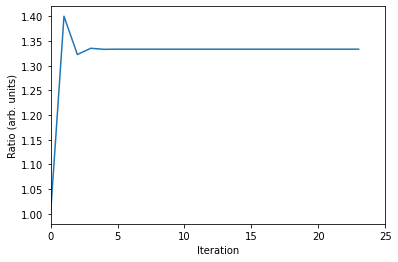

In [18]:
plt.plot([np.linalg.matrix_power(B, n)[:,0][0]/np.linalg.matrix_power(B, n)[:,0][1] for n in range(1, 25)])
plt.ylabel('Ratio (arb. units)')
plt.xlabel('Iteration')
plt.xlim(0, 25)
plt.show()